In [1]:
import pandas as pd
import numpy as np

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
data = pd.read_csv("../data/filtered_reviews_in_Phonex.csv")
data

,Unnamed: 0,review_id,user_id,business_id,stars,text,date,business_name,city,state,categories
0,1,aBWKb49Xfkv1946YN7_SIg,sSPbLBHcEMXaJfoO8zs1bA,poSV39UqEg-gpESXafS9-g,5.0,"Amazing food, drinks, service!\n\nWe started w...",2016-01-17 05:33:14,Angry Crab Shack,Phoenix,AZ,"Restaurants, American (New), Seafood, Cajun/Cr..."
1,2,jCHaWXgppmZjkOdpFltWGA,D5ywfFmwtJxLReqAYlDDmw,poSV39UqEg-gpESXafS9-g,5.0,I couldn't be more excited to have found this ...,2016-01-30 01:13:29,Angry Crab Shack,Phoenix,AZ,"Restaurants, American (New), Seafood, Cajun/Cr..."
2,5,CfueO6B4_WauGRQ0cq9Whg,fhwZh6_7YxWeVEuskKMTcA,poSV39UqEg-gpESXafS9-g,5.0,Loved this place! \nI came for crab legs and w...,2016-05-07 01:19:53,Angry Crab Shack,Phoenix,AZ,"Restaurants, American (New), Seafood, Cajun/Cr..."
3,7,S8YMS-nYudRr-_NIT0CZqg,CyL4Nh9VHti5oIfcWevRIg,poSV39UqEg-gpESXafS9-g,5.0,I love sea food and I loved the Angry Crab Sha...,2016-02-11 23:00:41,Angry Crab Shack,Phoenix,AZ,"Restaurants, American (New), Seafood, Cajun/Cr..."
4,11,mseSVlHQ87m1pyJvbIT3GA,jPfONqo5q5SNz0Dh131W2Q,poSV39UqEg-gpESXafS9-g,5.0,We've been to the chandler location twice.Noth...,2018-02-02 01:34:57,Angry Crab Shack,Phoenix,AZ,"Restaurants, American (New), Seafood, Cajun/Cr..."
...,...,...,...,...,...,...,...,...,...,...,...
219554,510848,xn_0_mUS8FqvLD6OkLOO5w,W2K94WPhkHNHXMiaAIA7Jg,NPQBXnKDzAFimQPT7SSEAw,5.0,What a find! I hate to review this place cause...,2019-02-02 16:29:46,Pigtails Desert Ridge,Phoenix,AZ,"Bars, Nightlife, Tapas/Small Plates, Cocktail ..."
219555,510850,d2W2V2N3EYc19bEmTQFJ-A,el3TmKFEFzZOcNbCw2FNlQ,NPQBXnKDzAFimQPT7SSEAw,5.0,Y'all!! Desert Ridge got a speakeasy!!! Locate...,2019-08-14 23:49:23,Pigtails Desert Ridge,Phoenix,AZ,"Bars, Nightlife, Tapas/Small Plates, Cocktail ..."
219556,510853,w41yhCe4HsosDZyiIpYG4Q,Wdz7oPzkqG_JFMPDBsq8Wg,NPQBXnKDzAFimQPT7SSEAw,5.0,Great drinks the bartender made us something t...,2019-11-03 08:43:20,Pigtails Desert Ridge,Phoenix,AZ,"Bars, Nightlife, Tapas/Small Plates, Cocktail ..."
219557,510854,FIkGcpQJf3LXqZe3QbdVkg,zy4A7504SezncCAcotMv4g,NPQBXnKDzAFimQPT7SSEAw,4.0,I really like the speakeasy feel of this place...,2019-06-29 02:38:36,Pigtails Desert Ridge,Phoenix,AZ,"Bars, Nightlife, Tapas/Small Plates, Cocktail ..."


In [3]:
train_df = pd.read_pickle('../data/train_df.pkl')
val_df = pd.read_pickle('../data/valid_df.pkl')
test_df = pd.read_pickle('../data/test_df.pkl')

In [4]:
train_df.head()

,user_id,business_id,stars
0,--2HUmLkcNHZp0xw6AMBPg,yX0pOWG_Be9TjGnm0aihVA,5.0
1,--2HUmLkcNHZp0xw6AMBPg,u9R0_pvEkl7QGPJYH3j1sg,5.0
2,--2HUmLkcNHZp0xw6AMBPg,cHdJXLlKNWixBXpDwEGb_A,5.0
3,--2HUmLkcNHZp0xw6AMBPg,LR_99E7tVUfxqemvcGkDzw,3.0
4,--2HUmLkcNHZp0xw6AMBPg,lfyg98UFNYMVk18p6LIlkw,5.0


## lightFM

In [5]:
import lightfm
from lightfm import LightFM
from lightfm.data import Dataset
from lightfm import cross_validation

from lightfm.evaluation import precision_at_k as lightfm_prec_at_k
from lightfm.evaluation import recall_at_k as lightfm_recall_at_k
from lightfm.evaluation import auc_score 

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [83]:
# default number of recommendations
K = 1
# percentage of data used for testing
TEST_PERCENTAGE = 0.25
# model learning rate
LEARNING_RATE = 0.25
# no of latent factors
NO_COMPONENTS = 20
# no of epochs to fit model
NO_EPOCHS = 20
# no of threads to fit model
NO_THREADS = 32
# regularisation for both user and item features
ITEM_ALPHA=1e-6
USER_ALPHA=1e-6

# seed for pseudonumber generations
SEEDNO = 42

In [7]:
dataset = Dataset()
dataset.fit(users=train_df["user_id"], items=train_df["business_id"])

In [8]:
num_users, num_topics = dataset.interactions_shape()
print(f'Num users: {num_users}, num_topics: {num_topics}.')

Num users: 19683, num_topics: 1728.


In [9]:
# train_interactions, test_interactions = cross_validation.random_train_test_split(
#     interactions, test_percentage=TEST_PERCENTAGE,
#     random_state=np.random.RandomState(SEEDNO))

In [10]:
(train_interactions, train_weights) = dataset.build_interactions(train_df.values)
(val_interactions, val_weights) = dataset.build_interactions(val_df.values)
(test_interactions, test_weights) = dataset.build_interactions(test_df.values)

In [11]:
print(f"Shape of train interactions: {train_interactions.shape}")
print(f"Shape of train interactions: {val_interactions.shape}")
print(f"Shape of test interactions: {test_interactions.shape}")

Shape of train interactions: (19683, 1728)
Shape of train interactions: (19683, 1728)
Shape of test interactions: (19683, 1728)


In [12]:
model1 = LightFM(loss='warp', no_components=NO_COMPONENTS, 
                 learning_rate=LEARNING_RATE,                 
                 random_state=np.random.RandomState(SEEDNO))

In [13]:
model1.fit(interactions=train_interactions, epochs=NO_EPOCHS)

In [84]:
eval_precision_lfm = lightfm_prec_at_k(model1, val_interactions, 
                                           train_interactions, k=K).mean()
eval_recall_lfm = lightfm_recall_at_k(model1, val_interactions, 
                                          train_interactions, k=K).mean()
eval_auc_lfm = auc_score(model1, val_interactions, 
                                          train_interactions).mean()
    
print(
    "\n------ Using LightFM evaluation methods ------",
    f"Precision@K:\t{eval_precision_lfm:.6f}",
    f"Recall@K:\t{eval_recall_lfm:.6f}", 
    f"AUC:\t{eval_auc_lfm:.6f}", 
    sep='\n')


------ Using LightFM evaluation methods ------
Precision@K:	0.000410
Recall@K:	0.000410
AUC:	0.586453


## hybrid lightfm

In [16]:
data["categories"].unique()

array(['Restaurants, American (New), Seafood, Cajun/Creole, Barbeque',
       'Mexican, Restaurants, Hot Dogs', 'Restaurants, American (New)',
       ...,
       'American (Traditional), Restaurants, Music Venues, Performing Arts, Nightlife, Arts & Entertainment, Bars',
       'Wine Bars, American (New), Tapas/Small Plates, Restaurants, Bars, Nightlife',
       'Bars, Nightlife, Tapas/Small Plates, Cocktail Bars, Restaurants'],
      dtype=object)

In [17]:
# get all categories
cate_lst = []
for categories in data["categories"].unique():
    for i in categories.split(','):
        cate_lst.append(i.strip())
cate_lst = list(set(cate_lst))

In [18]:
bus_df = data[["business_id","categories"]].drop_duplicates()
bus_df = bus_df.reset_index(drop=True)
bus_df

,business_id,categories
0,poSV39UqEg-gpESXafS9-g,"Restaurants, American (New), Seafood, Cajun/Cr..."
1,d_q4avZYM1sOlQP7noJKVg,"Mexican, Restaurants, Hot Dogs"
2,k1c_bC3DK6mKg797vH1T8w,"Restaurants, American (New)"
3,kBJfBVaXJtPEKLTov1hJdQ,"Barbeque, Cambodian, Noodles, Asian Fusion, Re..."
4,vhKUBKcOm8zOLxeS3XM9iA,"Pizza, Restaurants"
...,...,...
1723,ayAe3Ap3lN2tPwkfKDLeuA,"Mexican, Restaurants"
1724,2adhYiY1IQ5flntw30Sdew,"American (Traditional), Restaurants, Music Ven..."
1725,Aqy2wQmWH1YkiCaQeqG1jg,"American (New), Restaurants"
1726,5V8O-vas5A4XGWqxsJ7GBg,"Wine Bars, American (New), Tapas/Small Plates,..."


In [19]:
bus_df = bus_df[bus_df["business_id"].isin(train_df["business_id"])]
bus_df.reset_index(drop=True)

,business_id,categories
0,poSV39UqEg-gpESXafS9-g,"Restaurants, American (New), Seafood, Cajun/Cr..."
1,d_q4avZYM1sOlQP7noJKVg,"Mexican, Restaurants, Hot Dogs"
2,k1c_bC3DK6mKg797vH1T8w,"Restaurants, American (New)"
3,kBJfBVaXJtPEKLTov1hJdQ,"Barbeque, Cambodian, Noodles, Asian Fusion, Re..."
4,vhKUBKcOm8zOLxeS3XM9iA,"Pizza, Restaurants"
...,...,...
1723,ayAe3Ap3lN2tPwkfKDLeuA,"Mexican, Restaurants"
1724,2adhYiY1IQ5flntw30Sdew,"American (Traditional), Restaurants, Music Ven..."
1725,Aqy2wQmWH1YkiCaQeqG1jg,"American (New), Restaurants"
1726,5V8O-vas5A4XGWqxsJ7GBg,"Wine Bars, American (New), Tapas/Small Plates,..."


In [20]:
business_cate = []
for i in range(len(bus_df)):
    i_lst = []
    for j in bus_df.loc[i,"categories"].split(','):
        i_lst.append(j.strip())
    business_cate.append(i_lst)

In [21]:
dataset2 = Dataset()
dataset2.fit(train_df['user_id'], train_df['business_id'], item_features=cate_lst)

In [22]:
item_features = dataset2.build_item_features(
    (x, y) for x,y in zip(bus_df.business_id, business_cate))

In [23]:
item_features.todense().shape

(1728, 1966)

In [24]:
(train_interactions2, train_weights) = dataset2.build_interactions(train_df.values)
(val_interactions2, val_weights) = dataset2.build_interactions(val_df.values)
(test_interactions2, test_weights) = dataset2.build_interactions(test_df.values)

In [25]:
model2 = LightFM(loss='warp', no_components=NO_COMPONENTS, 
                 learning_rate=LEARNING_RATE, 
                 item_alpha=ITEM_ALPHA,
                 user_alpha=USER_ALPHA,
                 random_state=np.random.RandomState(SEEDNO))

In [26]:
model2.fit(interactions=train_interactions2,
           item_features=item_features,
           epochs=NO_EPOCHS)

In [85]:
eval_precision_lfm = lightfm_prec_at_k(model2, val_interactions2, 
                                           train_interactions2,item_features=item_features, k=K).mean()
eval_recall_lfm = lightfm_recall_at_k(model2, val_interactions2, 
                                          train_interactions2, item_features=item_features,k=K).mean()
eval_auc_lfm = auc_score(model2, val_interactions2, 
                                          train_interactions2,item_features=item_features).mean()
    
print(
    "\n------ Using LightFM evaluation methods with categories ------",
    f"Precision@K:\t{eval_precision_lfm:.6f}",
    f"Recall@K:\t{eval_recall_lfm:.6f}", 
    f"AUC:\t{eval_auc_lfm:.6f}", 
    sep='\n')


------ Using LightFM evaluation methods with categories ------
Precision@K:	0.009333
Recall@K:	0.009333
AUC:	0.763221


### tuning parameters

In [95]:
# default number of recommendations
K = 1

# model learning rate
LEARNING_RATE = 0.25
# no of latent factors
NO_COMPONENTS = 20
# no of epochs to fit model
NO_EPOCHS = 20
# no of threads to fit model
NO_THREADS = 32
# regularisation for both user and item features
ITEM_ALPHA=1e-6

In [87]:
learning_rate_all = [0.01,0.1,0.2,0.25,0.3,0.4]
precision_lr = []
recall_lr = []
auc_lr = []
for LEARNING_RATE in learning_rate_all:
    model = LightFM(loss='warp', no_components=NO_COMPONENTS, 
                 learning_rate=LEARNING_RATE, 
                 item_alpha=ITEM_ALPHA,
                 random_state=np.random.RandomState(SEEDNO))
    model.fit(interactions=train_interactions2,item_features=item_features,epochs=NO_EPOCHS)
    eval_precision_lfm = lightfm_prec_at_k(model, val_interactions2, 
                                           train_interactions2,item_features=item_features, k=K).mean()
    eval_recall_lfm = lightfm_recall_at_k(model, val_interactions2, 
                                          train_interactions2, item_features=item_features,k=K).mean()
    eval_auc_lfm = auc_score(model, val_interactions2, 
                                          train_interactions2,item_features=item_features).mean()

    precision_lr.append(eval_precision_lfm)
    recall_lr.append(eval_recall_lfm)
    auc_lr.append(eval_auc_lfm)

Text(0, 0.5, 'AUC')

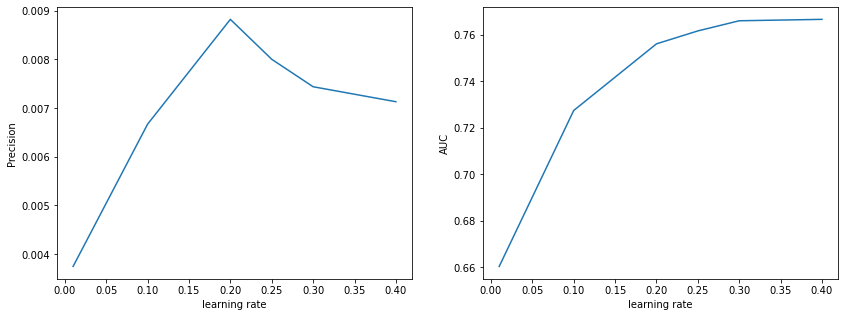

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
ax = plt.subplot(1,2,1)
plt.plot(learning_rate_all,precision_lr)
plt.xlabel("learning rate")
plt.ylabel("Precision")

ax = plt.subplot(1,2,2)
plt.plot(learning_rate_all,auc_lr,label="")
plt.xlabel("learning rate")
plt.ylabel("AUC")

In [91]:
reg_all = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2]
precision_reg = []
recall_reg = []
auc_reg = []
for ITEM_ALPHA in reg_all:
    model = LightFM(loss='warp', no_components=NO_COMPONENTS, 
                 learning_rate=LEARNING_RATE, 
                 item_alpha=ITEM_ALPHA,
                 random_state=np.random.RandomState(SEEDNO))
    model.fit(interactions=train_interactions2,item_features=item_features,epochs=NO_EPOCHS)
    eval_precision_lfm = lightfm_prec_at_k(model, val_interactions2, 
                                           train_interactions2,item_features=item_features, k=K).mean()
    eval_recall_lfm = lightfm_recall_at_k(model, val_interactions2, 
                                          train_interactions2, item_features=item_features,k=K).mean()
    eval_auc_lfm = auc_score(model, val_interactions2, 
                                          train_interactions2,item_features=item_features).mean()

    precision_reg.append(eval_precision_lfm)
    recall_reg.append(eval_recall_lfm)
    auc_reg.append(eval_auc_lfm)

Text(0, 0.5, 'AUC')

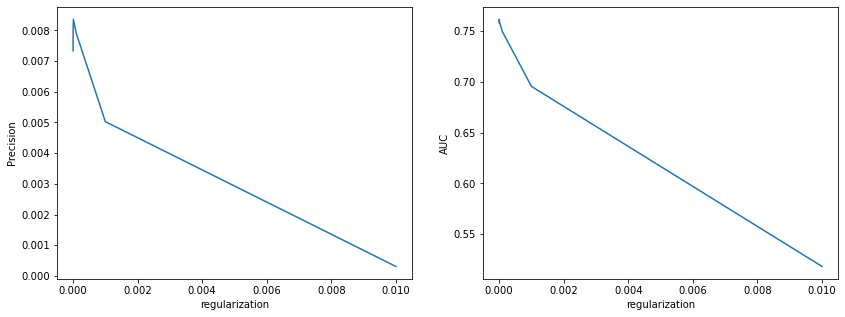

In [94]:
plt.figure(figsize=(14,5))
ax = plt.subplot(1,2,1)
plt.plot(reg_all,precision_reg)
plt.xlabel("regularization")
plt.ylabel("Precision")

ax = plt.subplot(1,2,2)
plt.plot(reg_all,auc_reg)
plt.xlabel("regularization")
plt.ylabel("AUC")

In [96]:
components_all = [10,20,40,60]
precision_com = []
auc_com = []
for NO_COMPONENTS in components_all:
    model = LightFM(loss='warp', no_components=NO_COMPONENTS, 
                 learning_rate=LEARNING_RATE, 
                 item_alpha=ITEM_ALPHA,
                 random_state=np.random.RandomState(SEEDNO))
    model.fit(interactions=train_interactions2,item_features=item_features,epochs=NO_EPOCHS)
    eval_precision_lfm = lightfm_prec_at_k(model, val_interactions2, 
                                           train_interactions2,item_features=item_features, k=K).mean()
    eval_auc_lfm = auc_score(model, val_interactions2, 
                                          train_interactions2,item_features=item_features).mean()

    precision_com.append(eval_precision_lfm)
    recall_com.append(eval_recall_lfm)
    auc_com.append(eval_auc_lfm)

Text(0, 0.5, 'AUC')

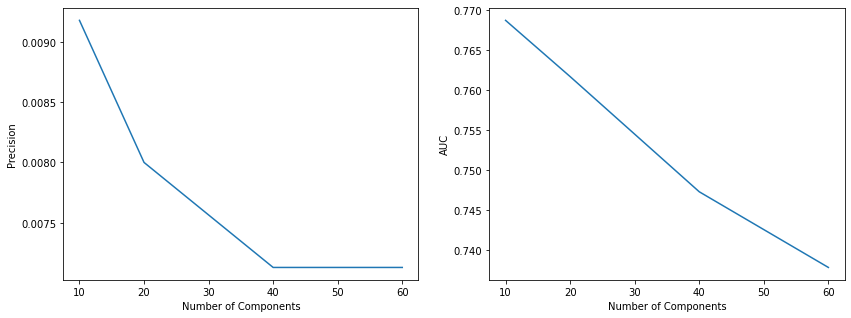

In [97]:
plt.figure(figsize=(14,5))
ax = plt.subplot(1,2,1)
plt.plot(components_all,precision_com)
plt.xlabel("Number of Components")
plt.ylabel("Precision")

ax = plt.subplot(1,2,2)
plt.plot(components_all,auc_com)
plt.xlabel("Number of Components")
plt.ylabel("AUC")

In [98]:
learning_rate_all = [0.2,0.25,0.3,0.35]
reg_all = [1e-7,1e-6,1e-5]
components = [10,20,30]

In [99]:
para_tuning_precision = {}
para_tuning_auc = {}
for LEARNING_RATE in learning_rate_all:
    for ITEM_ALPHA in reg_all:
        for NO_COMPONENTS in components:
            model = LightFM(loss='warp', no_components=NO_COMPONENTS, 
                 learning_rate=LEARNING_RATE, 
                 item_alpha=ITEM_ALPHA,
                 random_state=np.random.RandomState(SEEDNO))
            model.fit(interactions=train_interactions2,item_features=item_features,epochs=NO_EPOCHS)
            eval_precision_lfm = lightfm_prec_at_k(model, val_interactions2, 
                                           train_interactions2,item_features=item_features, k=K).mean()
            eval_auc_lfm = auc_score(model, val_interactions2, 
                                          train_interactions2,item_features=item_features).mean()
            
            para_tuning_precision[LEARNING_RATE,ITEM_ALPHA,NO_COMPONENTS] = eval_precision_lfm
            para_tuning_auc[LEARNING_RATE,ITEM_ALPHA,NO_COMPONENTS] = eval_auc_lfm

In [54]:
# para_tuning_auc

In [100]:
import operator
print(max(para_tuning_auc.items(), key=operator.itemgetter(1))[0])
print(f"auc = {para_tuning_auc[max(para_tuning_auc.items(), key=operator.itemgetter(1))[0]]}")

(0.35, 1e-06, 10)
auc = 0.7806720733642578


In [101]:
print(max(para_tuning_precision.items(), key=operator.itemgetter(1))[0])
print(f"precision = {para_tuning_precision[max(para_tuning_precision.items(), key=operator.itemgetter(1))[0]]}")

(0.25, 1e-05, 10)
precision = 0.010102564468979836


### test

In [110]:
# merge train_df and val_df
new_train_df = pd.concat([train_df,val_df])
(train_interactions3, train_weights3) = dataset2.build_interactions(new_train_df.values)

In [111]:
LEARNING_RATE = 0.25
ITEM_ALPHA = 1e-5
NO_COMPONENTS = 10
K=1
model3 = LightFM(loss='warp', no_components=NO_COMPONENTS, 
                 learning_rate=LEARNING_RATE, 
                 item_alpha=ITEM_ALPHA,
                 random_state=np.random.RandomState(SEEDNO))
model3.fit(interactions=train_interactions3,item_features=item_features,epochs=NO_EPOCHS)

eval_precision_lfm = lightfm_prec_at_k(model3, test_interactions2, 
                                           train_interactions3,item_features=item_features, k=K).mean()
eval_auc_lfm = auc_score(model3, test_interactions2, 
                                          train_interactions3,item_features=item_features).mean()
    
print(
    "on test data",
    "\n------ Using LightFM evaluation methods with categories after tuning parameters ------",
    f"Precision@K:\t{eval_precision_lfm:.6f}",
    f"AUC:\t{eval_auc_lfm:.6f}", 
    sep='\n')

on test data

------ Using LightFM evaluation methods with categories after tuning parameters ------
Precision@K:	0.008769
AUC:	0.761924
